In [1]:
from solcore import material
from solcore.structure import Layer, Junction, TunnelJunction
from solcore.solar_cell import SolarCell
from solcore.solar_cell_solver import solar_cell_solver
from solcore.light_source import LightSource
import solcore.poisson_drift_diffusion as PDD

import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 298
wl = np.linspace(350, 1050, 301) * 1e-9

In [3]:
i_GaAs = material("GaAs")(T=T)
window_bottom = material("GaInP")(T=T, Nd=5e24, In=0.49)
n_GaAs = material("GaAs")(T=T, Nd=1e24)
p_GaAs = material("GaAs")(T=T, Na=8e22)
bsf_bottom = material("GaInP")(T=T, Na=5e24, In=0.49)

In [4]:
GaAs_junction = Junction(
    [Layer(width=150e-9, material=n_GaAs, role="Emitter"),
     Layer(width=2000e-9, material=p_GaAs, role="Base")],
#     sn=1e6, #    dd.frontboundary("ohmic", device["sn"], device["sp"], 0)
#     sp=1e6, #    dd.backboundary("ohmic", device["sn"], device["sp"], 0)
    T=T,
    kind="PDD")

In [5]:
my_solar_cell = SolarCell(
    [GaAs_junction],
    T=T,
    substrate=i_GaAs)

In [6]:
light_source = LightSource(
    source_type="standard",
    version="AM1.5g",
    x=wl,
    output_units="photon_flux_per_m",
    concentration=1)

In [7]:
solar_cell_solver(my_solar_cell,"qe",
    user_options={"light_source": light_source,
        "wavelength": wl,
        "optics_method": "TMM",
                 },)

Calculating RAT...
Calculating absorption profile...
Solving QE of the solar cell...
Solving quantum efficiency...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!



In [8]:
num_con = 19 #จำนวนในการสร้างแสง
con = np.logspace(0, 3, num_con)
# vint = np.linspace(-3.5, 4, 600)
V = np.linspace(-1.4, 0, 300)

allI = []
isc = []
voc = []
FF = []
pmpp = []

In [24]:
num_con = 19 #จำนวนในการสร้างแสง
con = np.logspace(-30, 50, num_con)
# vint = np.linspace(-3.5, 4, 600)
V = np.linspace(-1.4, 0, 100)

allI = []
isc = []
voc = []
FF = []
pmpp = []
temp = []
light_source.concentration = 1
# my_solar_cell = SolarCell([GaAs_junction],T=i+274.15,substrate=i_GaAs)
solar_cell_solver(
    my_solar_cell,#วัสดุ
    "iv",#วัดIV
    user_options={
        "light_source": light_source,
        "wavelength": wl,
        "optics_method": None,#ไม่คำนึงถึงการตกกระทบทางแสงหรือเข้า100%ไม่แน่ใจ
        "light_iv": True,#ให่IV ออกมา
        "mpp": True,#ให้Mppออกมา
        "voltages": V,#ให้Vออกมา
#         "internal_voltages": vint,#ไม่แน่ใจอะไรคือVintเป็นbulid in หรือป่าวเท้าที่เห็นเป็นVoc
        
    },)

isc.append(my_solar_cell.iv["Isc"]) 
voc.append(my_solar_cell.iv["Voc"]) 
FF.append(my_solar_cell.iv["FF"])   
pmpp.append(my_solar_cell.iv["Pmpp"])
allI.append(my_solar_cell.iv["IV"][1])
temp.append(i)

Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...

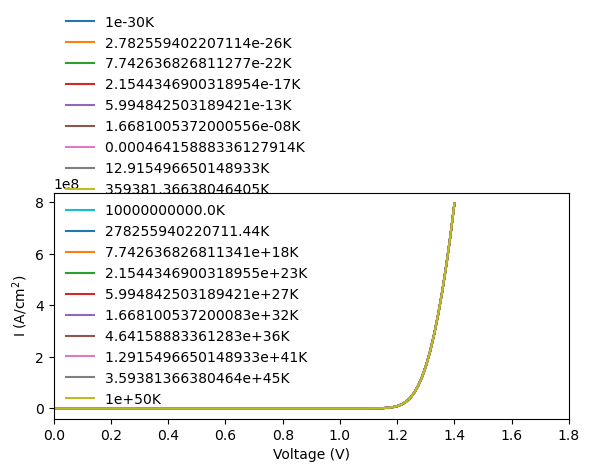

In [26]:
fig3, axIV = plt.subplots(1, 1, figsize=(6, 4))
# for i in range(num_con):
axIV.plot(-V, allI[0]/ isc[0] , label= '1 sun')
axIV.legend(loc="lower left", frameon=False)
axIV.set_ylim(0, 1.5)
axIV.set_xlim(0, 1.8)
axIV.set_xlabel("Voltage (V)")
axIV.set_ylabel("I (A/cm$^{2}$)")
plt.tight_layout()

In [11]:
isc[0]*voc[0]*1e-4

0.011063728772125487

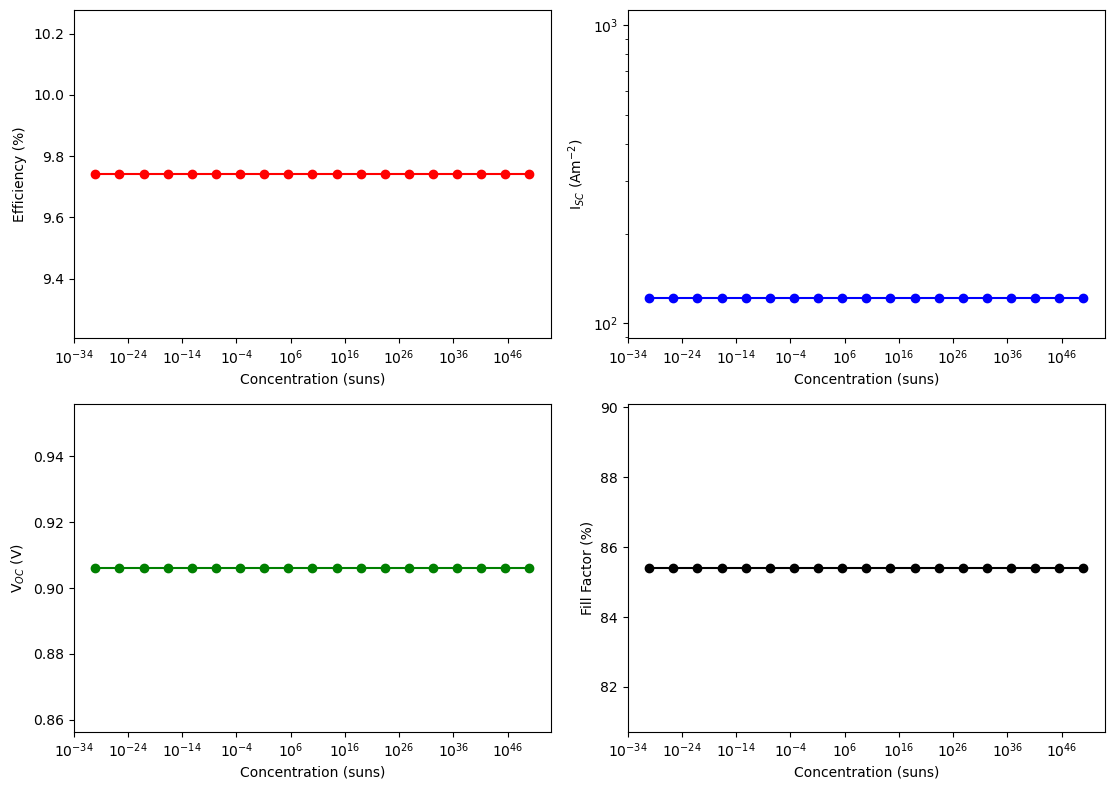

In [21]:
fig2, axes = plt.subplots(2, 2, figsize=(11.25, 8))

axes[0, 0].semilogx(con, np.array(pmpp)  / 970 * 100, "r-o") #ทำไมต้องหาร10ด้วยไม่เข้าใจเลย(ไม่ใช้หารด้วย 0.97หรอเพราะว่าAM1.5g = 970w/m^2)แล้วทำไมไม่x1000
axes[0, 0].set_xlabel("Concentration (suns)")         #ตอบหน่วยยังเป็นที่สงสัยอยู่
axes[0, 0].set_ylabel("Efficiency (%)")

axes[0, 1].loglog(con, abs(np.array(isc)), "b-o")
axes[0, 1].set_xlabel("Concentration (suns)")
axes[0, 1].set_ylabel("I$_{SC}$ (Am$^{-2}$)")

axes[1, 0].semilogx(con, abs(np.array(voc)), "g-o")
axes[1, 0].set_xlabel("Concentration (suns)")
axes[1, 0].set_ylabel("V$_{OC}$ (V)")

axes[1, 1].semilogx(con, abs(np.array(FF)) * 100, "k-o")
axes[1, 1].set_xlabel("Concentration (suns)")
axes[1, 1].set_ylabel("Fill Factor (%)")

plt.tight_layout()

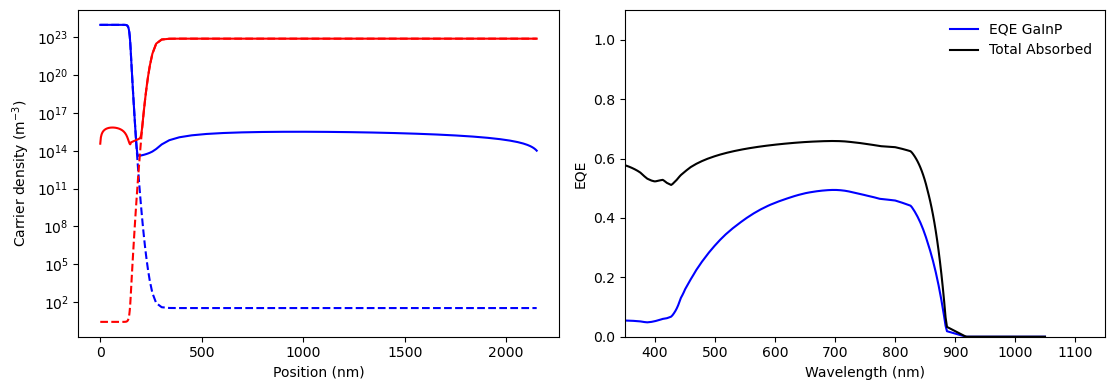

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11.25, 4))
for j in my_solar_cell.junction_indices:#junctionคือหยั่ง
    zz = (
        my_solar_cell[j].short_circuit_data.Bandstructure["x"] + my_solar_cell[j].offset)
    n = my_solar_cell[j].short_circuit_data.Bandstructure["n"]
    p = my_solar_cell[j].short_circuit_data.Bandstructure["p"]
    ax1.semilogy(zz * 1e9, n, "b")#อันนี้น่าจะเป็นการระบุcarrier densityของตอนฉายแสงของe และhole
    ax1.semilogy(zz * 1e9, p, "r")

    zz = my_solar_cell[j].equilibrium_data.Bandstructure["x"] + my_solar_cell[j].offset
    n = my_solar_cell[j].equilibrium_data.Bandstructure["n"]
    p = my_solar_cell[j].equilibrium_data.Bandstructure["p"]
    ax1.semilogy(zz * 1e9, n, "b--")#อันนี้น่าจะเป็นการระบุcarrier densityของตอนปิดแสงของe และhole
    ax1.semilogy(zz * 1e9, p, "r--")

ax1.set_xlabel("Position (nm)")
ax1.set_ylabel("Carrier density (m$^{-3}$)")
plt.tight_layout()

# And we plot the QE
labels = ["EQE GaInP", "EQE GaAs"]
colours = ["b", "r"]
for i, j in enumerate(my_solar_cell.junction_indices):#เป็นการพล็อตของeqeของแต่ละอันของGaAs และGaInP
    ax2.plot(wl * 1e9, my_solar_cell[j].eqe(wl), colours[i], label=labels[i])

ax2.plot(wl * 1e9, my_solar_cell.absorbed, "k", label="Total Absorbed")

ax2.legend(loc="upper right", frameon=False)
ax2.set_xlabel("Wavelength (nm)")
ax2.set_ylabel("EQE")
ax2.set_ylim(0, 1.1)
ax2.set_xlim(350, 1150)

plt.tight_layout()

In [ ]:
my_solar_cell.width